# Renaissance Stock Ranking System - Example Usage

This notebook demonstrates how to analyze the output from the Renaissance Stock Ranking System. We will explore the data, create various visualizations, and draw insights that can inform investment decisions.

## Table of Contents
1. [Setup and Data Loading](#setup)
2. [Basic Data Exploration](#explore)
3. [Return Analysis](#returns)
4. [Rank Analysis](#ranks)
5. [Performance Trends](#trends)
6. [Investment Insights](#insights)

## 1. Setup and Data Loading <a id="setup"></a>

First, we'll import the necessary packages and load the output files generated by the system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime

# Set up visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [2]:
# Function to find the latest output files
def get_latest_file(pattern):
    """Find the most recent file matching a pattern."""
    files = glob.glob(pattern)
    if not files:
        return None
    return max(files, key=os.path.getctime)

# Find and load the latest output files
rankings_file = get_latest_file('../output/NIFTY500_Rankings_*.csv')
rank_delta_file = get_latest_file('../output/NIFTY500_RankDelta_*.csv')

print(f"Using rankings file: {rankings_file}")
print(f"Using rank delta file: {rank_delta_file}")

# Load the data
rankings = pd.read_csv(rankings_file)
rank_delta = pd.read_csv(rank_delta_file)

print(f"Loaded {len(rankings)} ranked stocks")

Using rankings file: ../output/NIFTY500_Rankings_20231231.csv
Using rank delta file: ../output/NIFTY500_RankDelta_20231231.csv
Loaded 5 ranked stocks


## 2. Basic Data Exploration <a id="explore"></a>

Let's first take a look at the data to understand its structure.

In [3]:
# Look at the first few rows of the rankings data
print("Rankings data sample:")
rankings.head()

Rankings data sample:


,ISIN,Name,Date,YearlyReturn,Rank
0,INE030A01027,Bharti Airtel Ltd,2023-12-31,0.435427,1
1,INE062A01020,Tata Consultancy Services Ltd,2023-12-31,0.122693,2
2,INE001A01036,Reliance Industries Ltd,2023-12-31,0.057337,3
3,INE040A01034,HDFC Bank Ltd,2023-12-31,0.043993,4
4,INE009A01021,Infosys Ltd,2023-12-31,0.011850,5


In [4]:
# Look at the first few rows of the rank delta data
print("Rank delta data sample:")
rank_delta.head()

Rank delta data sample:


,ISIN,Name,Date,YearlyReturn,Rank,PreviousRank,RankDelta
0,INE001A01036,Reliance Industries Ltd,2023-12-31,0.057337,3,5.0,-2.0
1,INE040A01034,HDFC Bank Ltd,2023-12-31,0.043993,4,3.0,1.0
2,INE009A01021,Infosys Ltd,2023-12-31,0.011850,5,4.0,1.0
3,INE030A01027,Bharti Airtel Ltd,2023-12-31,0.435427,1,1.0,0.0
4,INE062A01020,Tata Consultancy Services Ltd,2023-12-31,0.122693,2,2.0,0.0


In [5]:
# Basic statistics for the rankings data
print("Rankings statistics:")
rankings.describe()

Rankings statistics:


,YearlyReturn,Rank
count,5.000000,5.000000
mean,0.134260,3.000000
std,0.173122,1.581139
min,0.011850,1.000000
25%,0.043993,2.000000
50%,0.057337,3.000000
75%,0.122693,4.000000
max,0.435427,5.000000


In [6]:
# Basic statistics for the rank delta data
print("Rank delta statistics:")
rank_delta.describe()

Rank delta statistics:


,YearlyReturn,Rank,PreviousRank,RankDelta
count,5.000000,5.000000,5.000000,5.000000
mean,0.134260,3.000000,3.000000,0.000000
std,0.173122,1.581139,1.581139,1.224745
min,0.011850,1.000000,1.000000,-2.000000
25%,0.043993,2.000000,2.000000,0.000000
50%,0.057337,3.000000,3.000000,0.000000
75%,0.122693,4.000000,4.000000,1.000000
max,0.435427,5.000000,5.000000,1.000000


## 3. Return Analysis <a id="returns"></a>

Now let's analyze the return distribution and identify top and bottom performers.

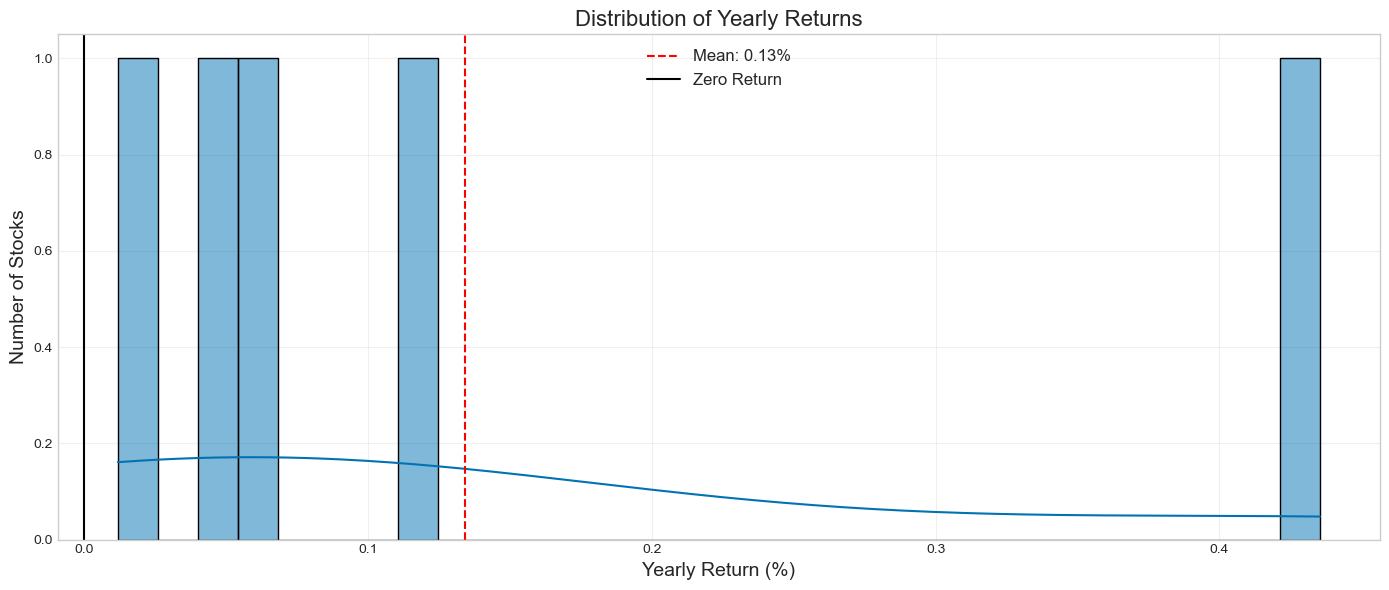

In [7]:
# Distribution of yearly returns
plt.figure(figsize=(14, 6))
sns.histplot(rankings['YearlyReturn'], kde=True, bins=30)
plt.title('Distribution of Yearly Returns', fontsize=16)
plt.xlabel('Yearly Return (%)', fontsize=14)
plt.ylabel('Number of Stocks', fontsize=14)
plt.axvline(rankings['YearlyReturn'].mean(), color='r', linestyle='--', 
            label=f"Mean: {rankings['YearlyReturn'].mean():.2f}%")
plt.axvline(0, color='black', linestyle='-', label="Zero Return")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

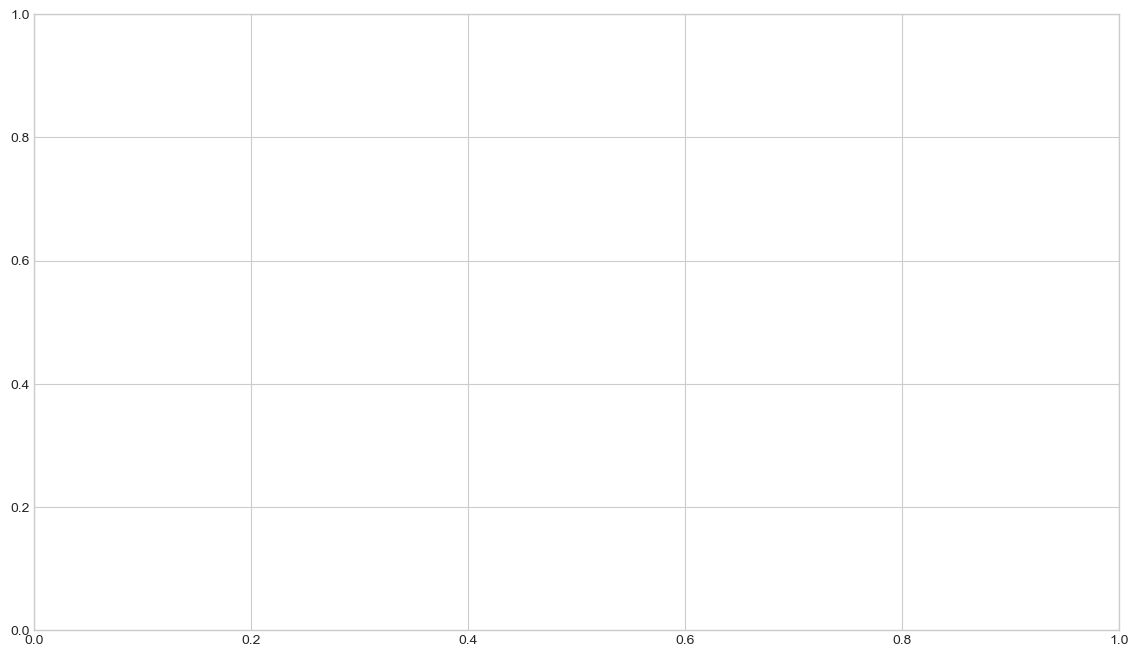

In [8]:
# Top 10 performers by yearly return
top10 = rankings.sort_values('YearlyReturn', ascending=False).head(10)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='YearlyReturn', y='Name', data=top10, hue='YearlyReturn', 
           palette='viridis', dodge=False, legend=False)

# Add value labels to the bars
for i, v in enumerate(top10['YearlyReturn']):
    ax.text(v + 1, i, f"{v:.2f}%", va='center', fontsize=11)

plt.title('Top 10 Performers by Yearly Return', fontsize=16)
plt.xlabel('Yearly Return (%)', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Bottom 10 performers by yearly return
bottom10 = rankings.sort_values('YearlyReturn').head(10)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='YearlyReturn', y='Name', data=bottom10, hue='YearlyReturn', 
           palette='viridis_r', dodge=False, legend=False)

# Add value labels to the bars
for i, v in enumerate(bottom10['YearlyReturn']):
    ax.text(v - 1, i, f"{v:.2f}%", va='center', ha='right', fontsize=11)

plt.title('Bottom 10 Performers by Yearly Return', fontsize=16)
plt.xlabel('Yearly Return (%)', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Return by sector (if sector data is available)
if 'Sector' in rankings.columns:
    # Aggregate returns by sector
    sector_returns = rankings.groupby('Sector')['YearlyReturn'].agg(['mean', 'median', 'std', 'count'])
    sector_returns = sector_returns.sort_values('mean', ascending=False)
    
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=sector_returns.index, y=sector_returns['mean'], palette='viridis')
    
    # Add count labels
    for i, (name, row) in enumerate(sector_returns.iterrows()):
        ax.text(i, 0.5, f"n={int(row['count'])}", ha='center', va='bottom', fontsize=10, rotation=90, alpha=0.7)
    
    plt.title('Average Yearly Return by Sector', fontsize=16)
    plt.xlabel('Sector', fontsize=14)
    plt.ylabel('Average Yearly Return (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Sector data not available. Consider adding sector information to the NIFTY 500 list file for enhanced analysis.")

## 4. Rank Analysis <a id="ranks"></a>

Now let's analyze the ranking and rank changes.

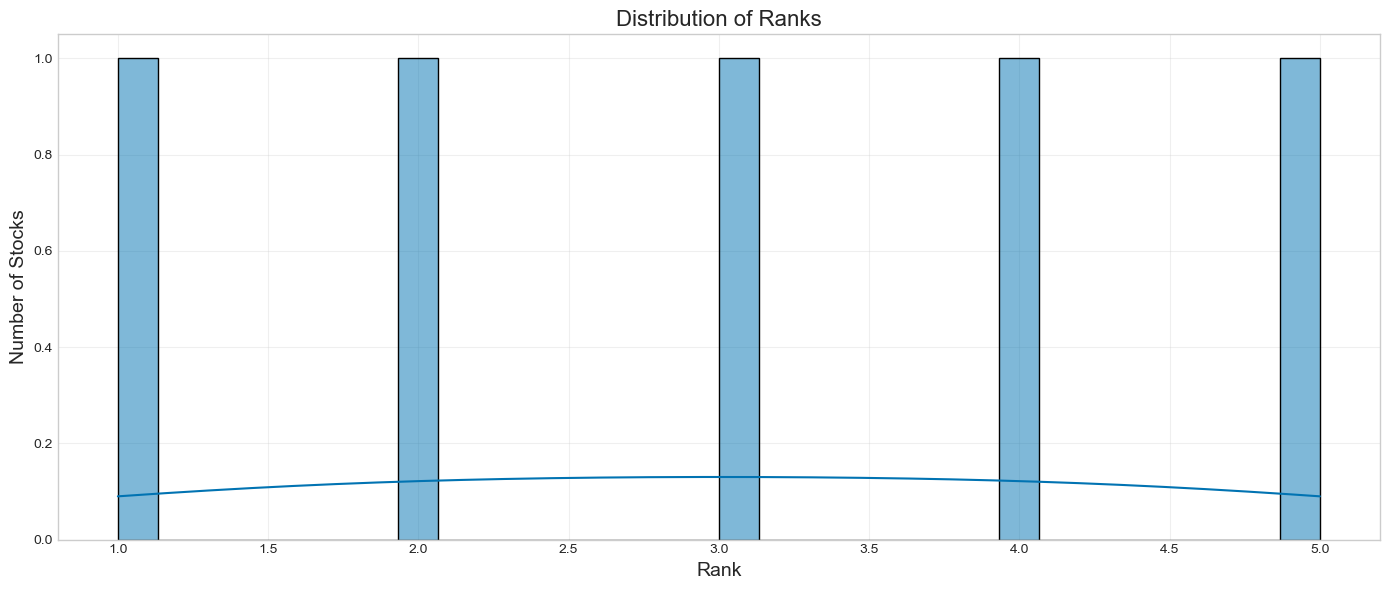

In [9]:
# Distribution of ranks
plt.figure(figsize=(14, 6))
sns.histplot(rankings['Rank'], kde=True, bins=30)
plt.title('Distribution of Ranks', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Number of Stocks', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

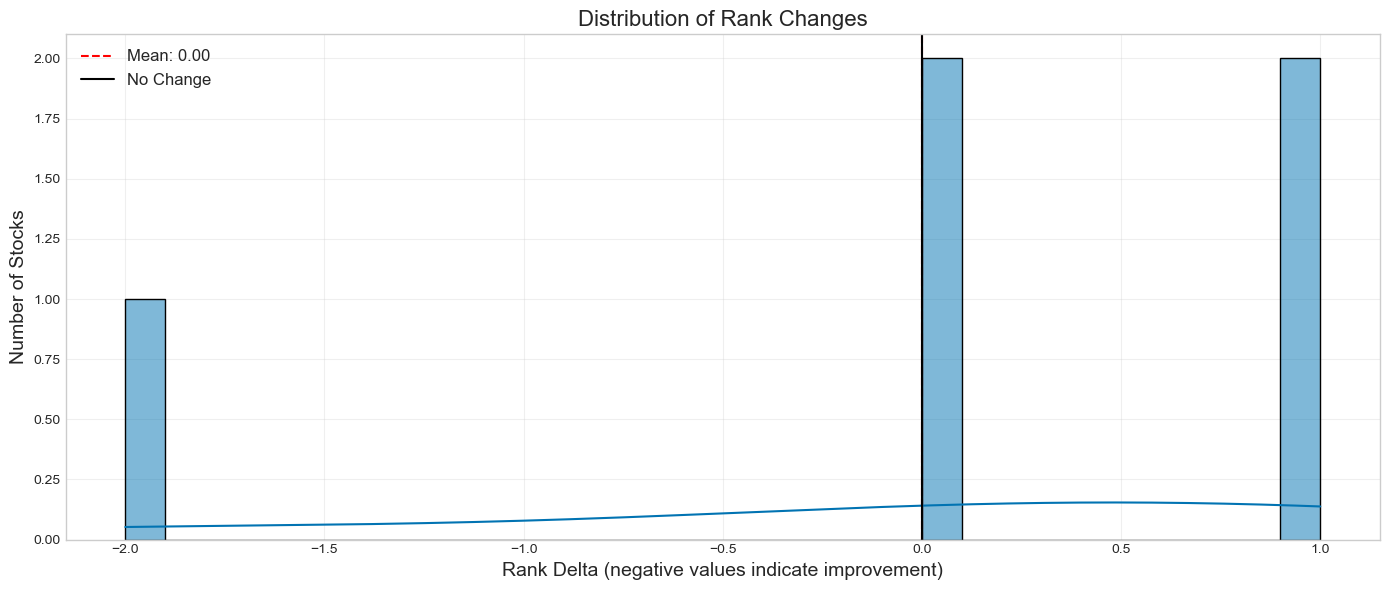

In [10]:
# Distribution of rank changes
if 'RankDelta' in rank_delta.columns:
    plt.figure(figsize=(14, 6))
    sns.histplot(rank_delta['RankDelta'], kde=True, bins=30)
    plt.title('Distribution of Rank Changes', fontsize=16)
    plt.xlabel('Rank Delta (negative values indicate improvement)', fontsize=14)
    plt.ylabel('Number of Stocks', fontsize=14)
    plt.axvline(rank_delta['RankDelta'].mean(), color='r', linestyle='--', 
                label=f"Mean: {rank_delta['RankDelta'].mean():.2f}")
    plt.axvline(0, color='black', linestyle='-', label="No Change")
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Rank delta data not available.")

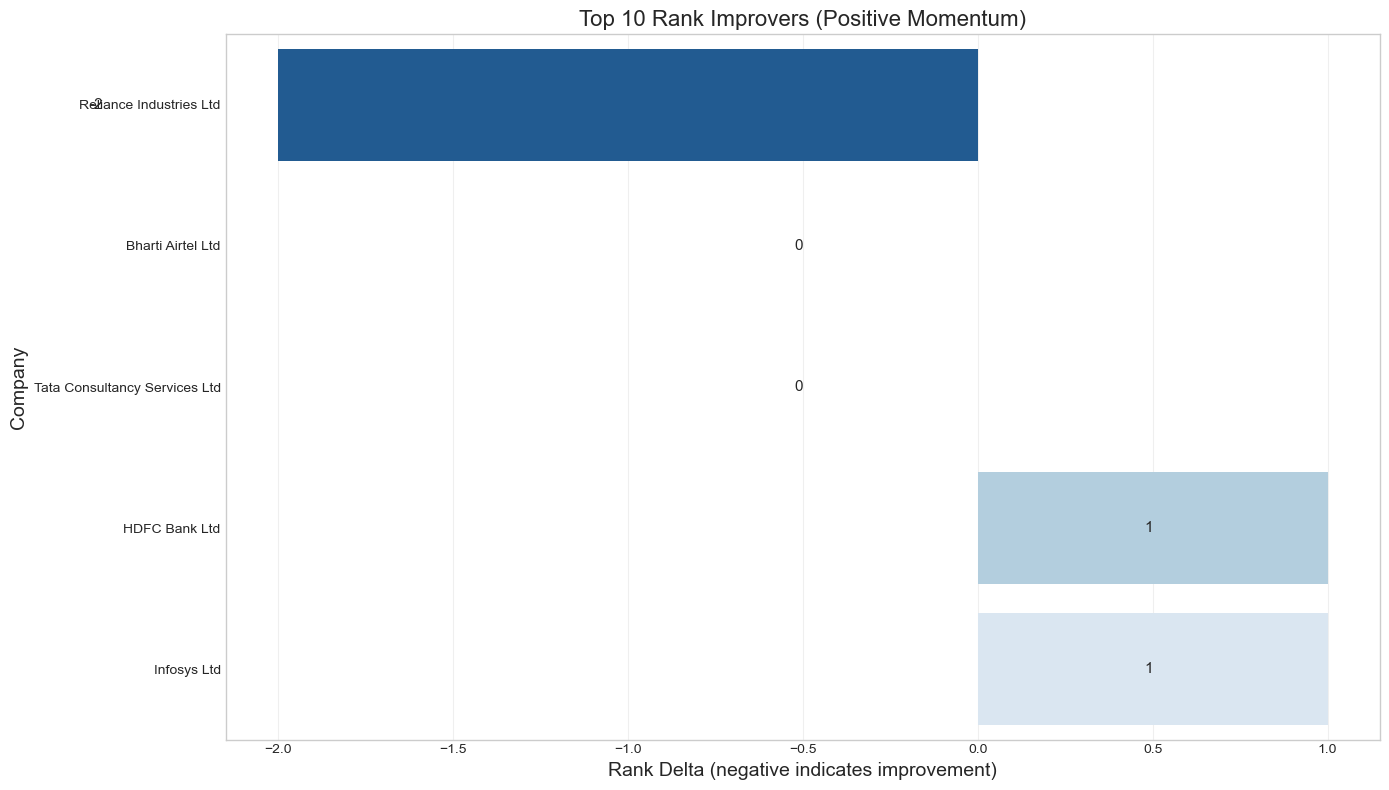

In [11]:
# Top improvers (biggest negative rank delta)
if 'RankDelta' in rank_delta.columns:
    top_improvers = rank_delta.sort_values('RankDelta').head(10)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='RankDelta', y='Name', data=top_improvers, palette='Blues_r')
    
    # Add value labels
    for i, v in enumerate(top_improvers['RankDelta']):
        ax.text(v - 0.5, i, f"{v:.0f}", va='center', ha='right', fontsize=11)
    
    plt.title('Top 10 Rank Improvers (Positive Momentum)', fontsize=16)
    plt.xlabel('Rank Delta (negative indicates improvement)', fontsize=14)
    plt.ylabel('Company', fontsize=14)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Rank delta data not available.")

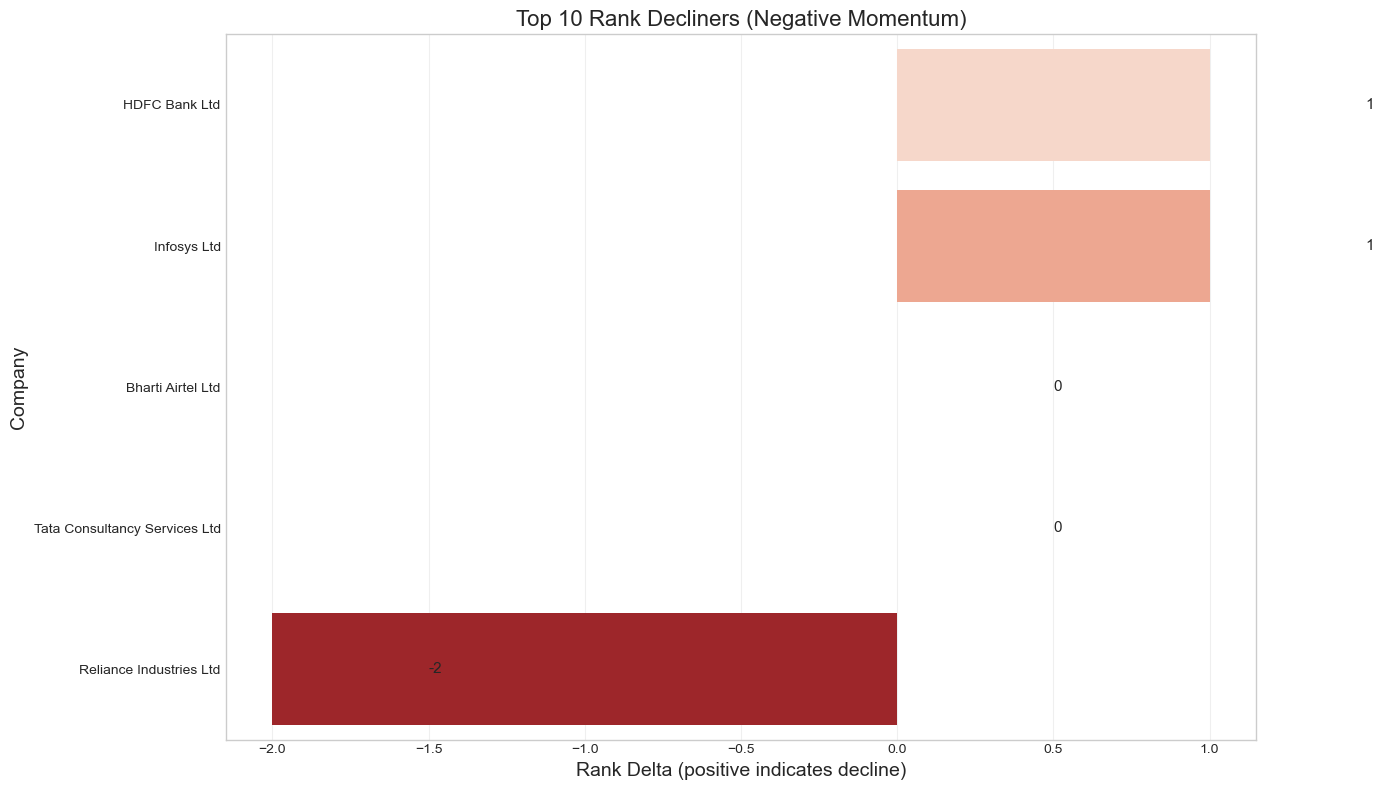

In [12]:
# Biggest decliners (biggest positive rank delta)
if 'RankDelta' in rank_delta.columns:
    top_decliners = rank_delta.sort_values('RankDelta', ascending=False).head(10)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='RankDelta', y='Name', data=top_decliners, palette='Reds')
    
    # Add value labels
    for i, v in enumerate(top_decliners['RankDelta']):
        ax.text(v + 0.5, i, f"{v:.0f}", va='center', fontsize=11)
    
    plt.title('Top 10 Rank Decliners (Negative Momentum)', fontsize=16)
    plt.xlabel('Rank Delta (positive indicates decline)', fontsize=14)
    plt.ylabel('Company', fontsize=14)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Rank delta data not available.")

## 5. Performance Trends <a id="trends"></a>

Now let's analyze potential patterns and trends in the data.

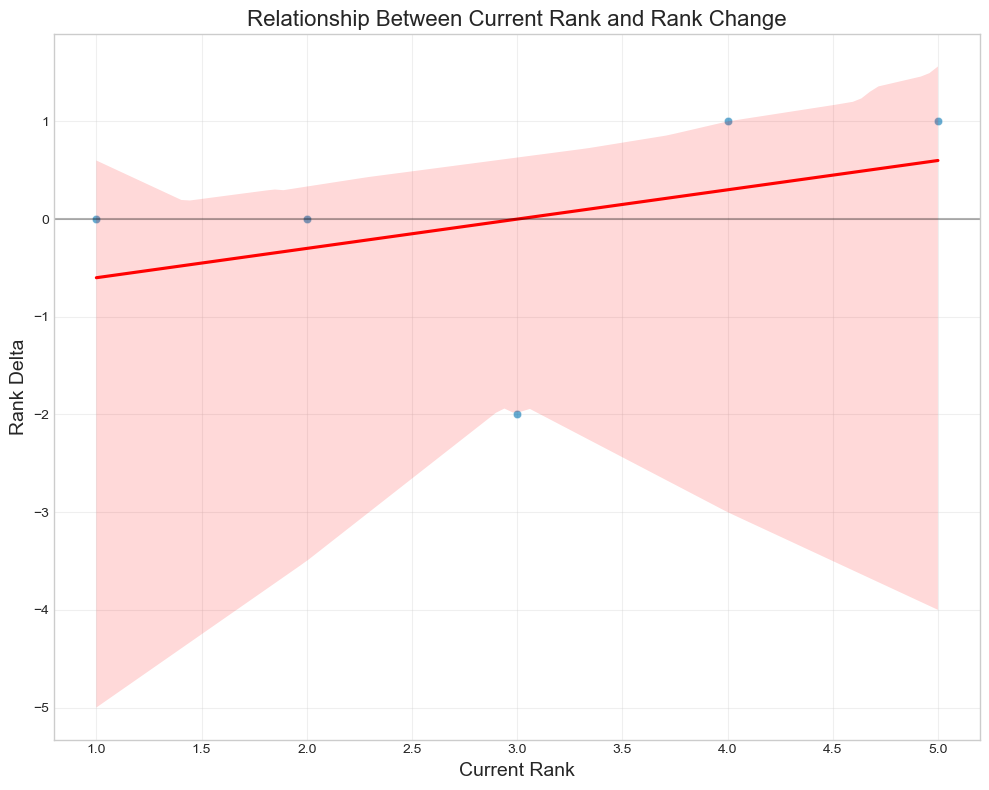

Correlation between Current Rank and Rank Delta: 0.387


In [13]:
# Relationship between current rank and rank delta
if 'RankDelta' in rank_delta.columns:
    # Merge the data
    merged_data = pd.merge(rankings, rank_delta, on='ISIN')
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Rank_x', y='RankDelta', data=merged_data, alpha=0.6)
    
    # Add a trend line
    sns.regplot(x='Rank_x', y='RankDelta', data=merged_data, 
                scatter=False, line_kws={"color": "red"})
    
    plt.title('Relationship Between Current Rank and Rank Change', fontsize=16)
    plt.xlabel('Current Rank', fontsize=14)
    plt.ylabel('Rank Delta', fontsize=14)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = merged_data['Rank_x'].corr(merged_data['RankDelta'])
    print(f"Correlation between Current Rank and Rank Delta: {correlation:.3f}")
else:
    print("Rank delta data not available.")

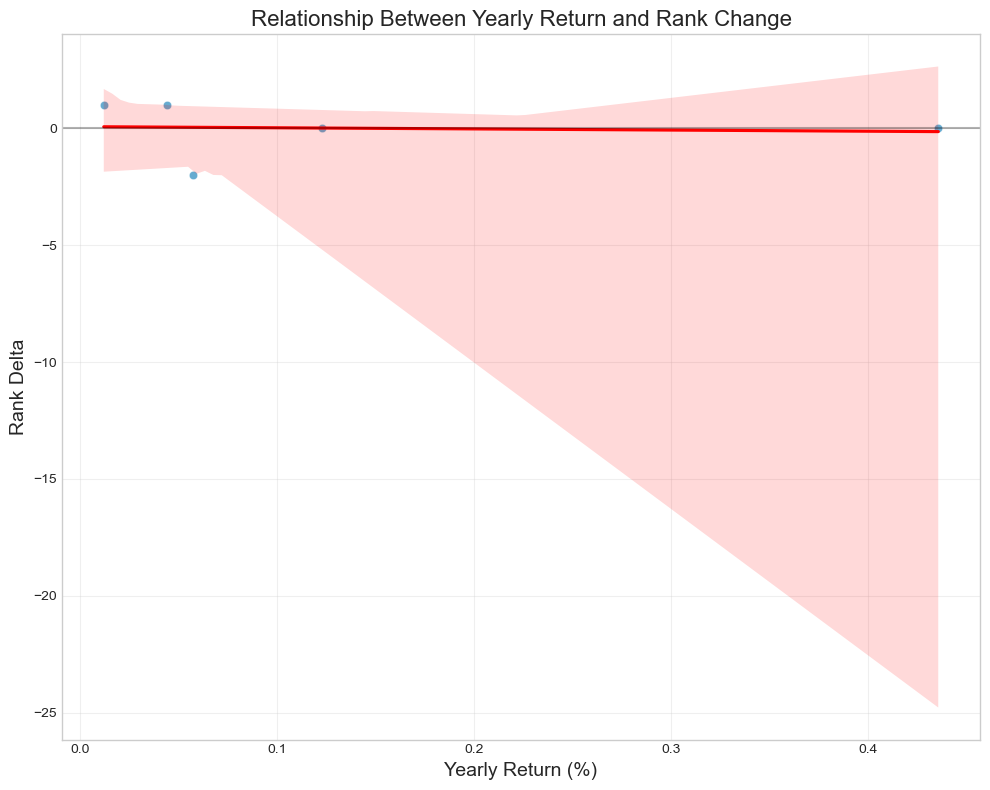

Correlation between Yearly Return and Rank Delta: -0.069


In [14]:
# Relationship between yearly return and rank delta
if 'RankDelta' in rank_delta.columns:
    # Merge the data
    merged_data = pd.merge(rankings, rank_delta, on='ISIN')
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='YearlyReturn_x', y='RankDelta', data=merged_data, alpha=0.6)
    
    # Add a trend line
    sns.regplot(x='YearlyReturn_x', y='RankDelta', data=merged_data, 
                scatter=False, line_kws={"color": "red"})
    
    plt.title('Relationship Between Yearly Return and Rank Change', fontsize=16)
    plt.xlabel('Yearly Return (%)', fontsize=14)
    plt.ylabel('Rank Delta', fontsize=14)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = merged_data['YearlyReturn_x'].corr(merged_data['RankDelta'])
    print(f"Correlation between Yearly Return and Rank Delta: {correlation:.3f}")
else:
    print("Rank delta data not available.")

## 6. Investment Insights <a id="insights"></a>

Finally, let's derive some investment insights from our analysis.

Top Stocks by Combined Performance (High Returns and Improving Ranks):


,Name_x,ISIN,YearlyReturn_x,Rank_x,RankDelta,Combined_Score
0,Bharti Airtel Ltd,INE030A01027,0.435427,1,0.0,1.739623
2,Reliance Industries Ltd,INE001A01036,0.057337,3,-2.0,1.188663
1,Tata Consultancy Services Ltd,INE062A01020,0.122693,2,0.0,-0.066815
3,HDFC Bank Ltd,INE040A01034,0.043993,4,1.0,-1.337901
4,Infosys Ltd,INE009A01021,0.011850,5,1.0,-1.523571


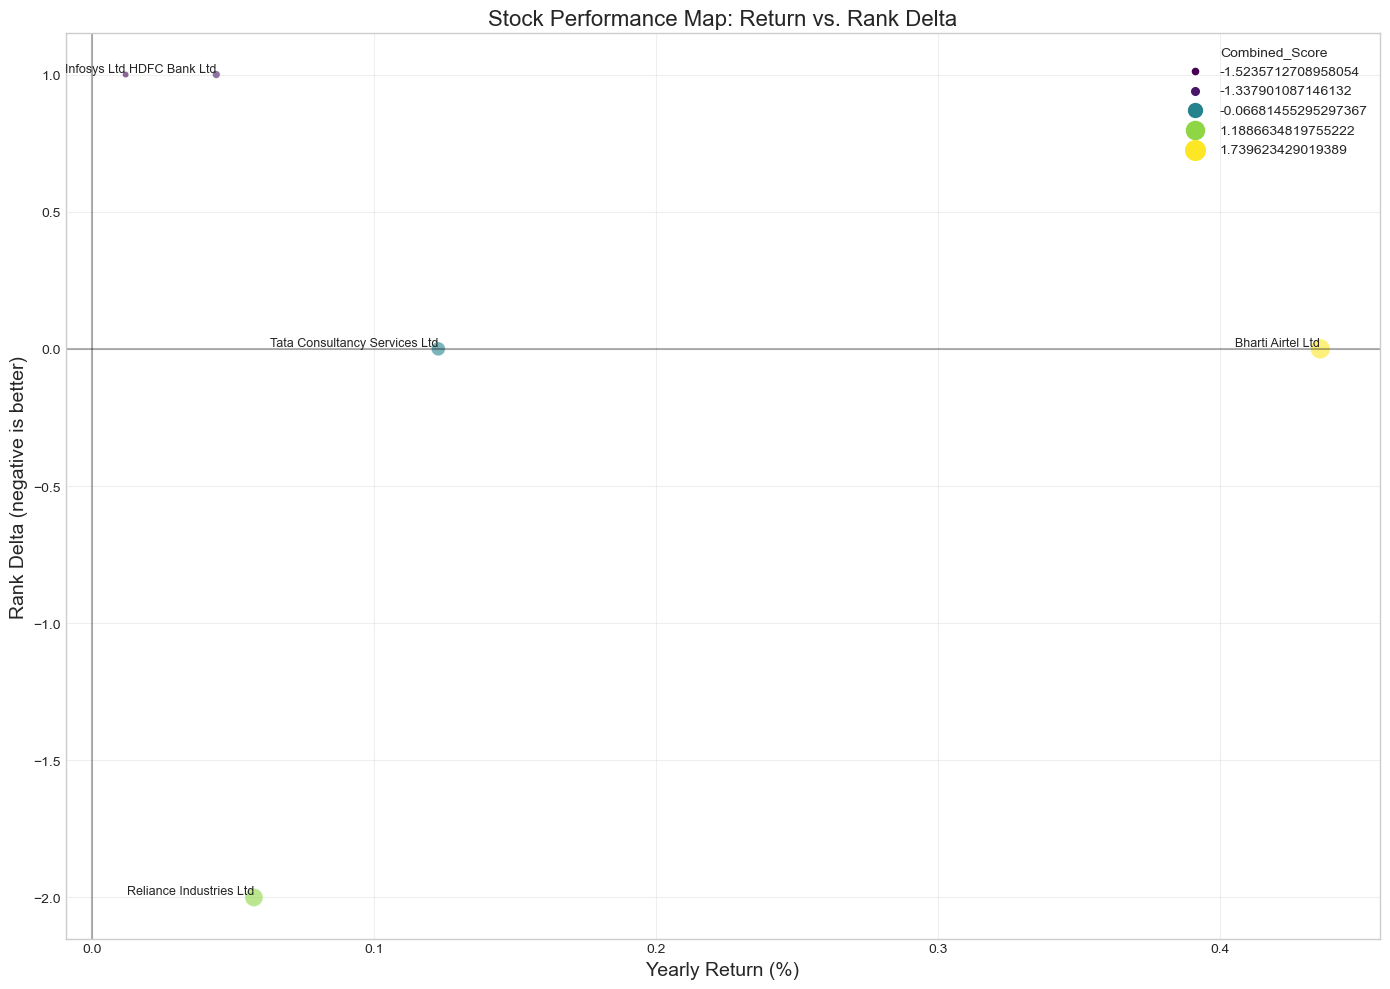

In [15]:
# Identify top stocks by combined metrics (high returns and improving ranks)
if 'RankDelta' in rank_delta.columns:
    # Merge the data
    merged_data = pd.merge(rankings, rank_delta, on='ISIN')
    
    # Normalize yearly return and rank delta for scoring
    merged_data['Return_Zscore'] = (merged_data['YearlyReturn_x'] - merged_data['YearlyReturn_x'].mean()) / merged_data['YearlyReturn_x'].std()
    merged_data['RankDelta_Zscore'] = (merged_data['RankDelta'] - merged_data['RankDelta'].mean()) / merged_data['RankDelta'].std()
    
    # Invert rank delta z-score (negative is better)
    merged_data['RankDelta_Zscore_Inv'] = -merged_data['RankDelta_Zscore']
    
    # Calculate combined score (higher is better)
    merged_data['Combined_Score'] = merged_data['Return_Zscore'] + merged_data['RankDelta_Zscore_Inv']
    
    # Top stocks by combined score
    top_combined = merged_data.sort_values('Combined_Score', ascending=False).head(15)
    
    # Display the top stocks
    print("Top Stocks by Combined Performance (High Returns and Improving Ranks):")
    display(top_combined[['Name_x', 'ISIN', 'YearlyReturn_x', 'Rank_x', 'RankDelta', 'Combined_Score']])
    
    # Visualize the top stocks
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x='YearlyReturn_x', y='RankDelta', size='Combined_Score', 
                    hue='Combined_Score', data=merged_data, alpha=0.6, 
                    palette='viridis', sizes=(20, 200))
    
    # Add labels for top stocks
    for _, row in top_combined.head(10).iterrows():
        plt.text(row['YearlyReturn_x'], row['RankDelta'], row['Name_x'], 
                 fontsize=9, ha='right', va='bottom')
    
    plt.title('Stock Performance Map: Return vs. Rank Delta', fontsize=16)
    plt.xlabel('Yearly Return (%)', fontsize=14)
    plt.ylabel('Rank Delta (negative is better)', fontsize=14)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Rank delta data not available for combined analysis.")

In [16]:
# Generate a summary report
print("Renaissance Stock Ranking Analysis Summary")
print("===========================================\n")

print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")
print(f"Number of Stocks Analyzed: {len(rankings)}\n")

print("Return Statistics:")
print(f"- Average Yearly Return: {rankings['YearlyReturn'].mean():.2f}%")
print(f"- Median Yearly Return: {rankings['YearlyReturn'].median():.2f}%")
print(f"- Range: {rankings['YearlyReturn'].min():.2f}% to {rankings['YearlyReturn'].max():.2f}%")
print(f"- Standard Deviation: {rankings['YearlyReturn'].std():.2f}%\n")

if 'RankDelta' in rank_delta.columns:
    print("Rank Change Statistics:")
    print(f"- Average Rank Delta: {rank_delta['RankDelta'].mean():.2f}")
    print(f"- Median Rank Delta: {rank_delta['RankDelta'].median():.2f}")
    print(f"- Range: {rank_delta['RankDelta'].min():.0f} to {rank_delta['RankDelta'].max():.0f}")
    print(f"- Standard Deviation: {rank_delta['RankDelta'].std():.2f}\n")

    # Calculate the percentage of stocks with improving ranks
    improving = (rank_delta['RankDelta'] < 0).sum()
    stable = (rank_delta['RankDelta'] == 0).sum()
    declining = (rank_delta['RankDelta'] > 0).sum()
    
    print("Rank Change Distribution:")
    print(f"- Improving Ranks: {improving} stocks ({improving/len(rank_delta)*100:.1f}%)")
    print(f"- Stable Ranks: {stable} stocks ({stable/len(rank_delta)*100:.1f}%)")
    print(f"- Declining Ranks: {declining} stocks ({declining/len(rank_delta)*100:.1f}%)\n")

print("Top 5 Stocks by Yearly Return:")
for i, (_, row) in enumerate(rankings.sort_values('YearlyReturn', ascending=False).head(5).iterrows()):
    print(f"{i+1}. {row['Name']} ({row['ISIN']}): {row['YearlyReturn']:.2f}%")
print()

if 'RankDelta' in rank_delta.columns:
    print("Top 5 Stocks by Rank Improvement:")
    for i, (_, row) in enumerate(rank_delta.sort_values('RankDelta').head(5).iterrows()):
        print(f"{i+1}. {row['Name']} ({row['ISIN']}): {row['RankDelta']:.0f} positions")
    print()

print("This analysis can be used as input for investment decisions, but should be complemented")
print("with fundamental analysis and other market factors before making investment choices.")

Renaissance Stock Ranking Analysis Summary

Analysis Date: 2025-03-20
Number of Stocks Analyzed: 5

Return Statistics:
- Average Yearly Return: 0.13%
- Median Yearly Return: 0.06%
- Range: 0.01% to 0.44%
- Standard Deviation: 0.17%

Rank Change Statistics:
- Average Rank Delta: 0.00
- Median Rank Delta: 0.00
- Range: -2 to 1
- Standard Deviation: 1.22

Rank Change Distribution:
- Improving Ranks: 1 stocks (20.0%)
- Stable Ranks: 2 stocks (40.0%)
- Declining Ranks: 2 stocks (40.0%)

Top 5 Stocks by Yearly Return:
1. Bharti Airtel Ltd (INE030A01027): 0.44%
2. Tata Consultancy Services Ltd (INE062A01020): 0.12%
3. Reliance Industries Ltd (INE001A01036): 0.06%
4. HDFC Bank Ltd (INE040A01034): 0.04%
5. Infosys Ltd (INE009A01021): 0.01%

Top 5 Stocks by Rank Improvement:
1. Reliance Industries Ltd (INE001A01036): -2 positions
2. Bharti Airtel Ltd (INE030A01027): 0 positions
3. Tata Consultancy Services Ltd (INE062A01020): 0 positions
4. HDFC Bank Ltd (INE040A01034): 1 positions
5. Infosys Lt